# **TUGAS BESAR DATA ANALITIK**
### Kelompok 4
### Studi Kasus 3

----


### **Import File dan Library** 

In [ ]:
from google.colab import files
files.upload()

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

Saving Dataset Case Study 3 - Prediksi Cara Kelahiran Bayi.xlsx to Dataset Case Study 3 - Prediksi Cara Kelahiran Bayi.xlsx


### **Eksplorasi Dataset**

In [ ]:
df=pd.read_excel('Dataset Case Study 3 - Prediksi Cara Kelahiran Bayi.xlsx')
print(df)
df.dtypes

    ID  Usia  ...  Gangguan Jantung  Melahirkan Normal
0    1    22  ...                 0                  1
1    2    26  ...                 0                  0
2    3    26  ...                 0                  1
3    4    28  ...                 0                  1
4    5    22  ...                 0                  0
..  ..   ...  ...               ...                ...
75  76    27  ...                 0                  1
76  77    33  ...                 0                  0
77  78    29  ...                 0                  0
78  79    25  ...                 0                  0
79  80    24  ...                 0                  1

[80 rows x 7 columns]


ID                   int64
Usia                 int64
Melahirkan ke-       int64
Waktu Melahirkan     int64
Tekanan Darah        int64
Gangguan Jantung     int64
Melahirkan Normal    int64
dtype: object

In [ ]:
df.isna()
df.isnull().sum()

ID                   0
Usia                 0
Melahirkan ke-       0
Waktu Melahirkan     0
Tekanan Darah        0
Gangguan Jantung     0
Melahirkan Normal    0
dtype: int64

In [ ]:
col_names = ['Usia','Melahirkan ke-', 'Waktu Melahirkan', 'Tekanan Darah', 'Gangguan Jantung', 'Melahirkan Normal']
for col in col_names:
  print(df[col].value_counts())

26    10
32     8
27     7
25     7
29     6
28     6
33     5
22     4
31     3
36     3
20     3
30     3
21     2
35     2
19     2
18     2
24     2
40     1
23     1
38     1
37     1
17     1
Name: Usia, dtype: int64
1    41
2    27
3    10
4     2
Name: Melahirkan ke-, dtype: int64
0    46
2    17
1    17
Name: Waktu Melahirkan, dtype: int64
1    40
2    20
0    20
Name: Tekanan Darah, dtype: int64
0    50
1    30
Name: Gangguan Jantung, dtype: int64
0    46
1    34
Name: Melahirkan Normal, dtype: int64


### **Data Preprocessing**

In [ ]:
del df['ID']

df['Waktu Melahirkan'] = df['Waktu Melahirkan'].map({0:'Tepat Waktu',
                             1:'Prematur',
                             2:'Terlambat'},
                             na_action=None)

df['Tekanan Darah'] = df['Tekanan Darah'].map({0:'Rendah',
                             1:'Normal',
                             2:'Tinggi'},
                             na_action=None)

df['Gangguan Jantung'] = df['Gangguan Jantung'].map({0:'Ya',
                             1:'Tidak'},
                             na_action=None)

df['Melahirkan Normal'] = df['Melahirkan Normal'].map({0:'Caesar',
                             1:'Normal'},
                             na_action=None)

In [ ]:
df.head()

,Usia,Melahirkan ke-,Waktu Melahirkan,Tekanan Darah,Gangguan Jantung,Melahirkan Normal
0,22,1,Tepat Waktu,Tinggi,Ya,Normal
1,26,2,Tepat Waktu,Normal,Ya,Caesar
2,26,2,Prematur,Normal,Ya,Normal
3,28,1,Tepat Waktu,Tinggi,Ya,Normal
4,22,2,Tepat Waktu,Normal,Ya,Caesar


In [ ]:
from sklearn import preprocessing

le_wm=preprocessing.LabelEncoder()
le_wm.fit(['Tepat Waktu','Prematur','Terlambat'])
df['Waktu Melahirkan']=le_wm.transform(df['Waktu Melahirkan'])

le_td=preprocessing.LabelEncoder()
le_td.fit(['Rendah','Normal','Tinggi'])
df['Tekanan Darah']=le_td.transform(df['Tekanan Darah'])

le_gj=preprocessing.LabelEncoder()
le_gj.fit(['Tidak','Ya'])
df['Gangguan Jantung']=le_gj.transform(df['Gangguan Jantung'])

In [ ]:
df.head()

,Usia,Melahirkan ke-,Waktu Melahirkan,Tekanan Darah,Gangguan Jantung,Melahirkan Normal
0,22,1,1,2,1,Normal
1,26,2,1,0,1,Caesar
2,26,2,0,0,1,Normal
3,28,1,1,2,1,Normal
4,22,2,1,0,1,Caesar


### **Data Splitting Dengan Skenario 80% Data Training dan 20% Data Testing**

In [ ]:
X = df.drop(['Melahirkan Normal'], axis=1)
y = df['Melahirkan Normal']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =42 )

X_train.shape, X_test.shape

((64, 5), (16, 5))

### **Build Model Decision Tree dan Menampilkan Nilai Prediksi dan Aktual**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion='entropy')
Tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
predTree_train = Tree.predict(X_train)
hasil_train = pd.DataFrame({'Predicted_JM': predTree_train, 'Actual_JM': y_train})
print(hasil_train)

   Predicted_JM Actual_JM
73       Normal    Normal
61       Caesar    Caesar
55       Normal    Normal
40       Caesar    Caesar
9        Caesar    Caesar
..          ...       ...
20       Normal    Normal
60       Normal    Normal
71       Caesar    Caesar
14       Caesar    Caesar
51       Caesar    Caesar

[64 rows x 2 columns]


In [ ]:
predTree_test = Tree.predict(X_test)
hasil_test = pd.DataFrame({'Predicted_JM': predTree_test, 'Actual_JM': y_test})
print(hasil_test)

   Predicted_JM Actual_JM
30       Caesar    Normal
0        Caesar    Normal
22       Normal    Normal
31       Caesar    Caesar
18       Caesar    Caesar
28       Caesar    Caesar
10       Caesar    Normal
70       Caesar    Caesar
4        Caesar    Caesar
12       Caesar    Normal
49       Caesar    Caesar
33       Normal    Caesar
67       Caesar    Normal
35       Caesar    Caesar
68       Caesar    Caesar
45       Caesar    Caesar


### **Performasi Model**

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cnfMatrix_train = confusion_matrix(y_train, predTree_train)
print('Decision Trees Accuracy In Data Training:' , metrics.accuracy_score(y_train,predTree_train))
cnfMatrix_train

Decision Trees Accuracy In Data Training: 0.96875


array([[36,  0],
       [ 2, 26]])

In [ ]:
cnfMatrix_test = confusion_matrix(y_test, predTree_test)
print('Decision Trees Accuracy In Data Testing:' , metrics.accuracy_score(y_test,predTree_test))
cnfMatrix_test

Decision Trees Accuracy In Data Testing: 0.625


array([[9, 1],
       [5, 1]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, predTree_train))

              precision    recall  f1-score   support

      Caesar       0.95      1.00      0.97        36
      Normal       1.00      0.93      0.96        28

    accuracy                           0.97        64
   macro avg       0.97      0.96      0.97        64
weighted avg       0.97      0.97      0.97        64



In [ ]:
print(classification_report(y_test, predTree_test))

              precision    recall  f1-score   support

      Caesar       0.64      0.90      0.75        10
      Normal       0.50      0.17      0.25         6

    accuracy                           0.62        16
   macro avg       0.57      0.53      0.50        16
weighted avg       0.59      0.62      0.56        16



### **Visualization Model**

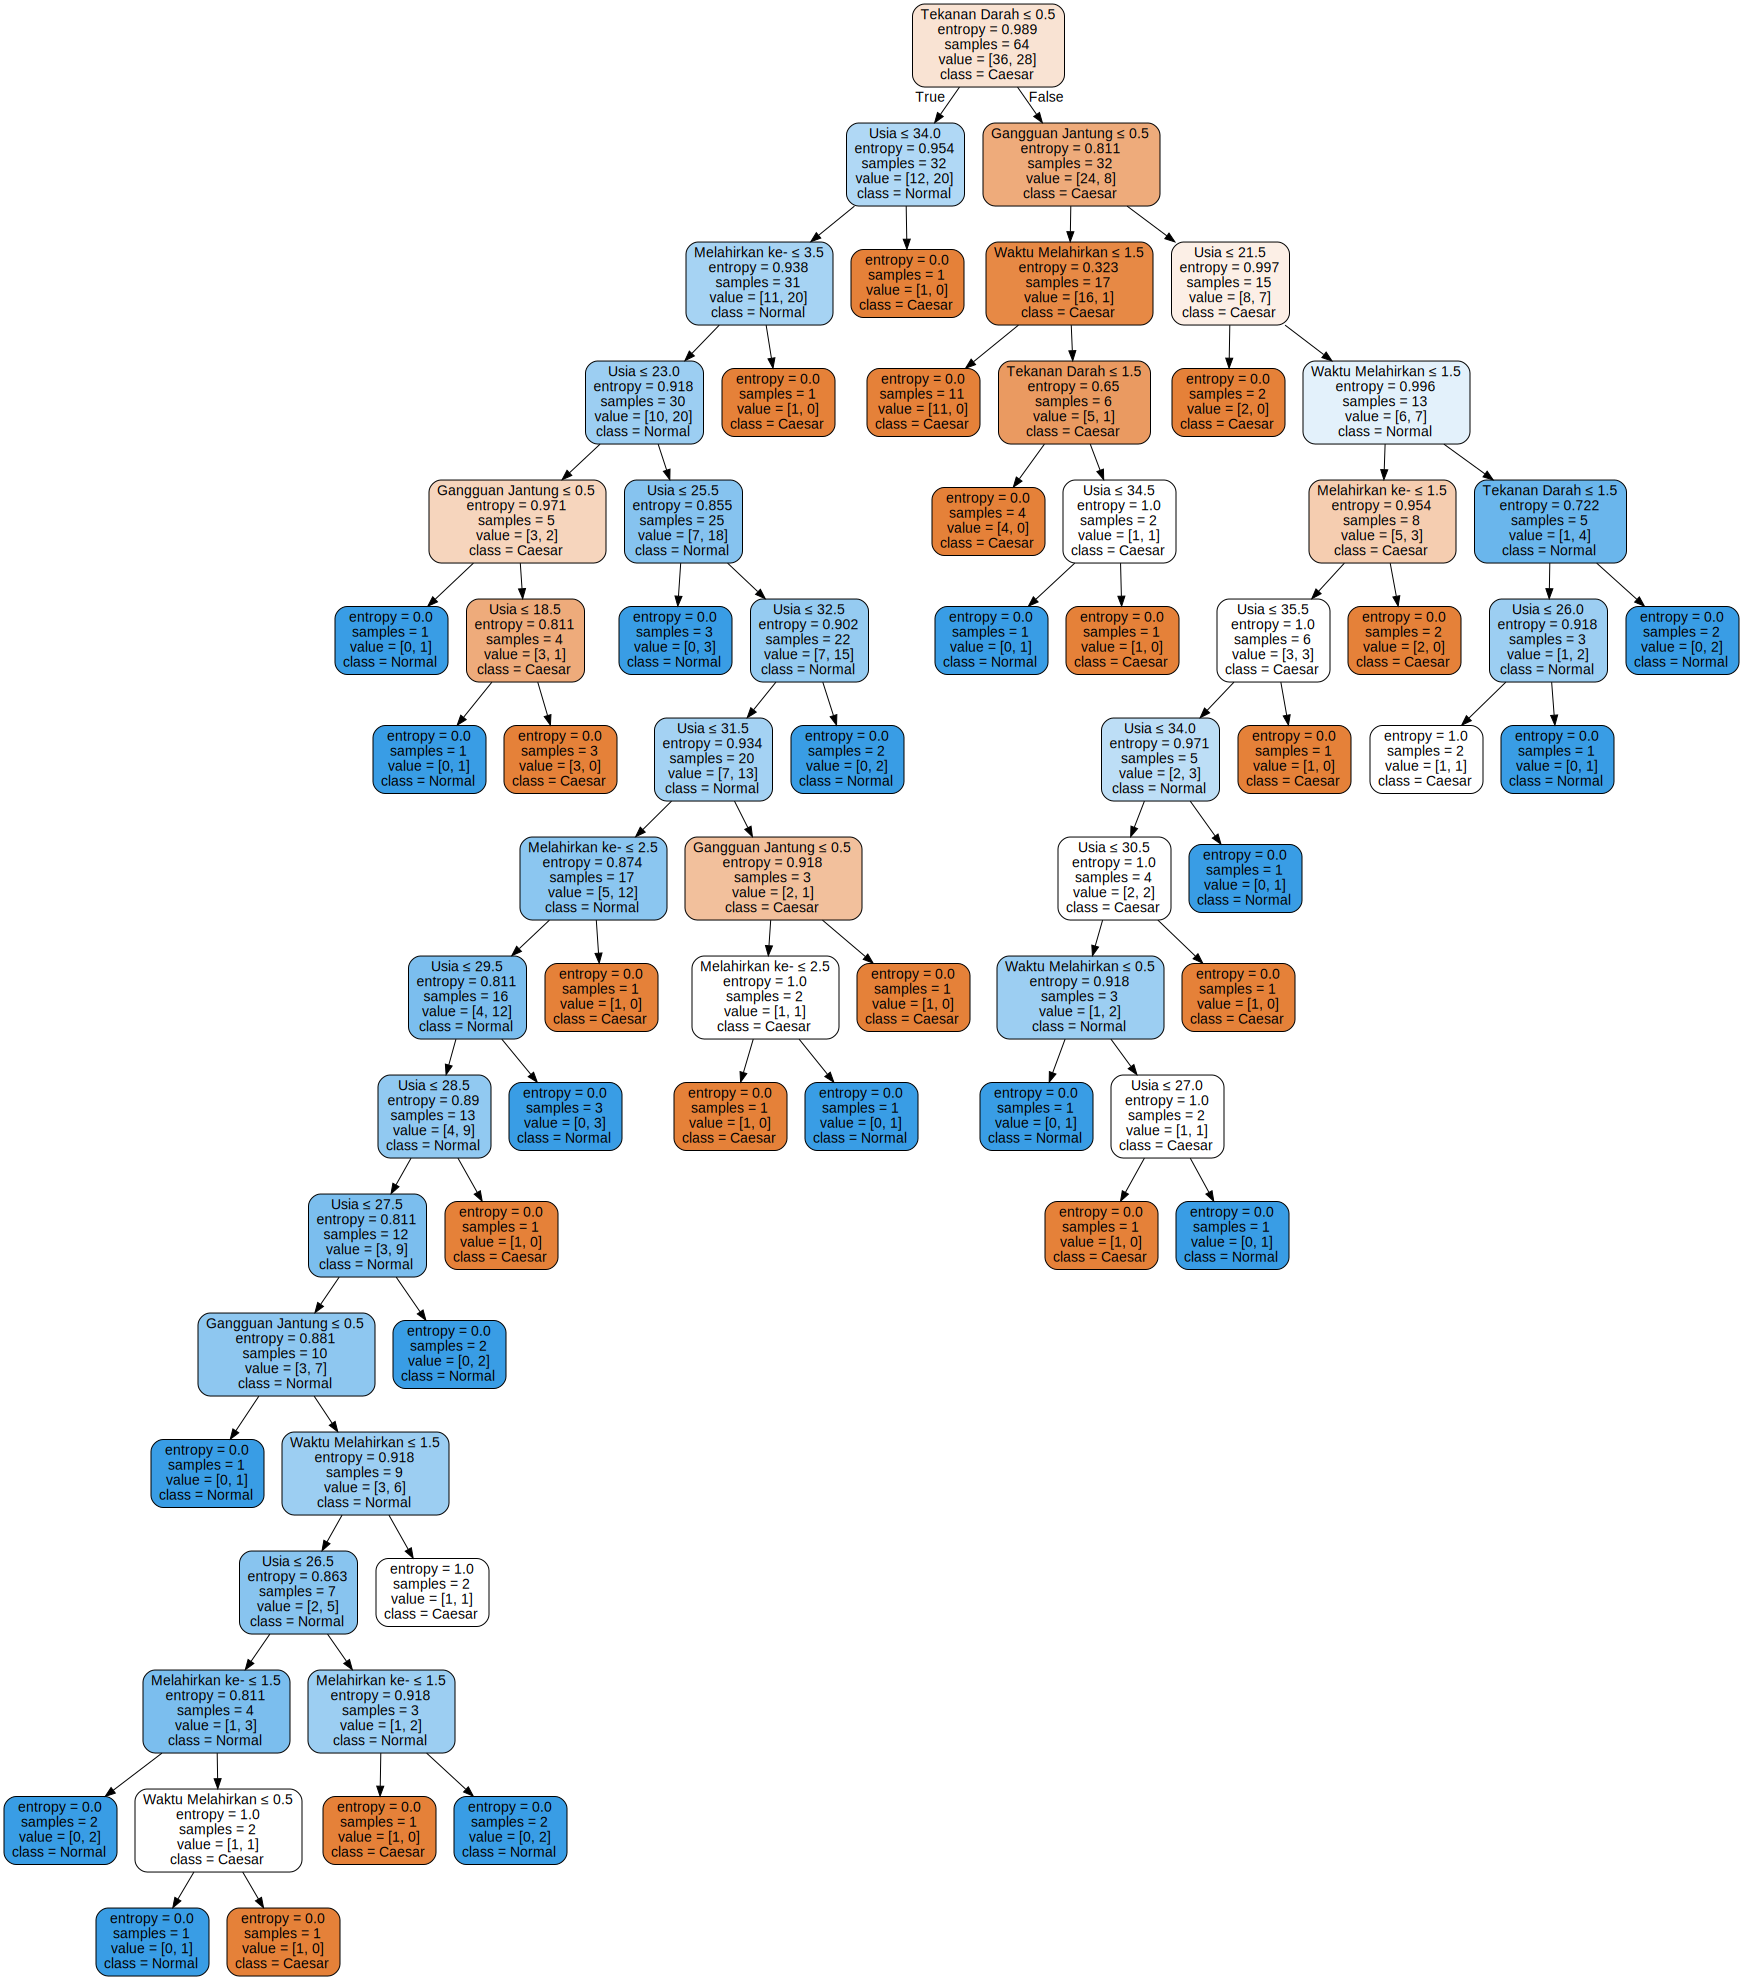

In [ ]:
import graphviz
from graphviz import Source
from sklearn import tree
dot_data = tree.export_graphviz(Tree,out_file=None, feature_names=X_train.columns,
                                class_names=np.unique(y_train), filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

### **K-fold Cross Validation**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=3, random_state=1, shuffle=True)

scores = cross_val_score(Tree, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy scores of each fold: ', scores)
print('Accuraacy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy scores of each fold:  [0.48148148 0.62962963 0.69230769]
Accuraacy: 0.601 (0.088)


### **Post-Pruning**

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0703125


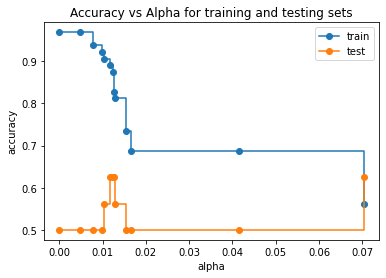

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs Alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

### **Model Visualization After Pruning**

In [ ]:
Tree_prun = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.0703125)
Tree_prun.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0703125, criterion='entropy')

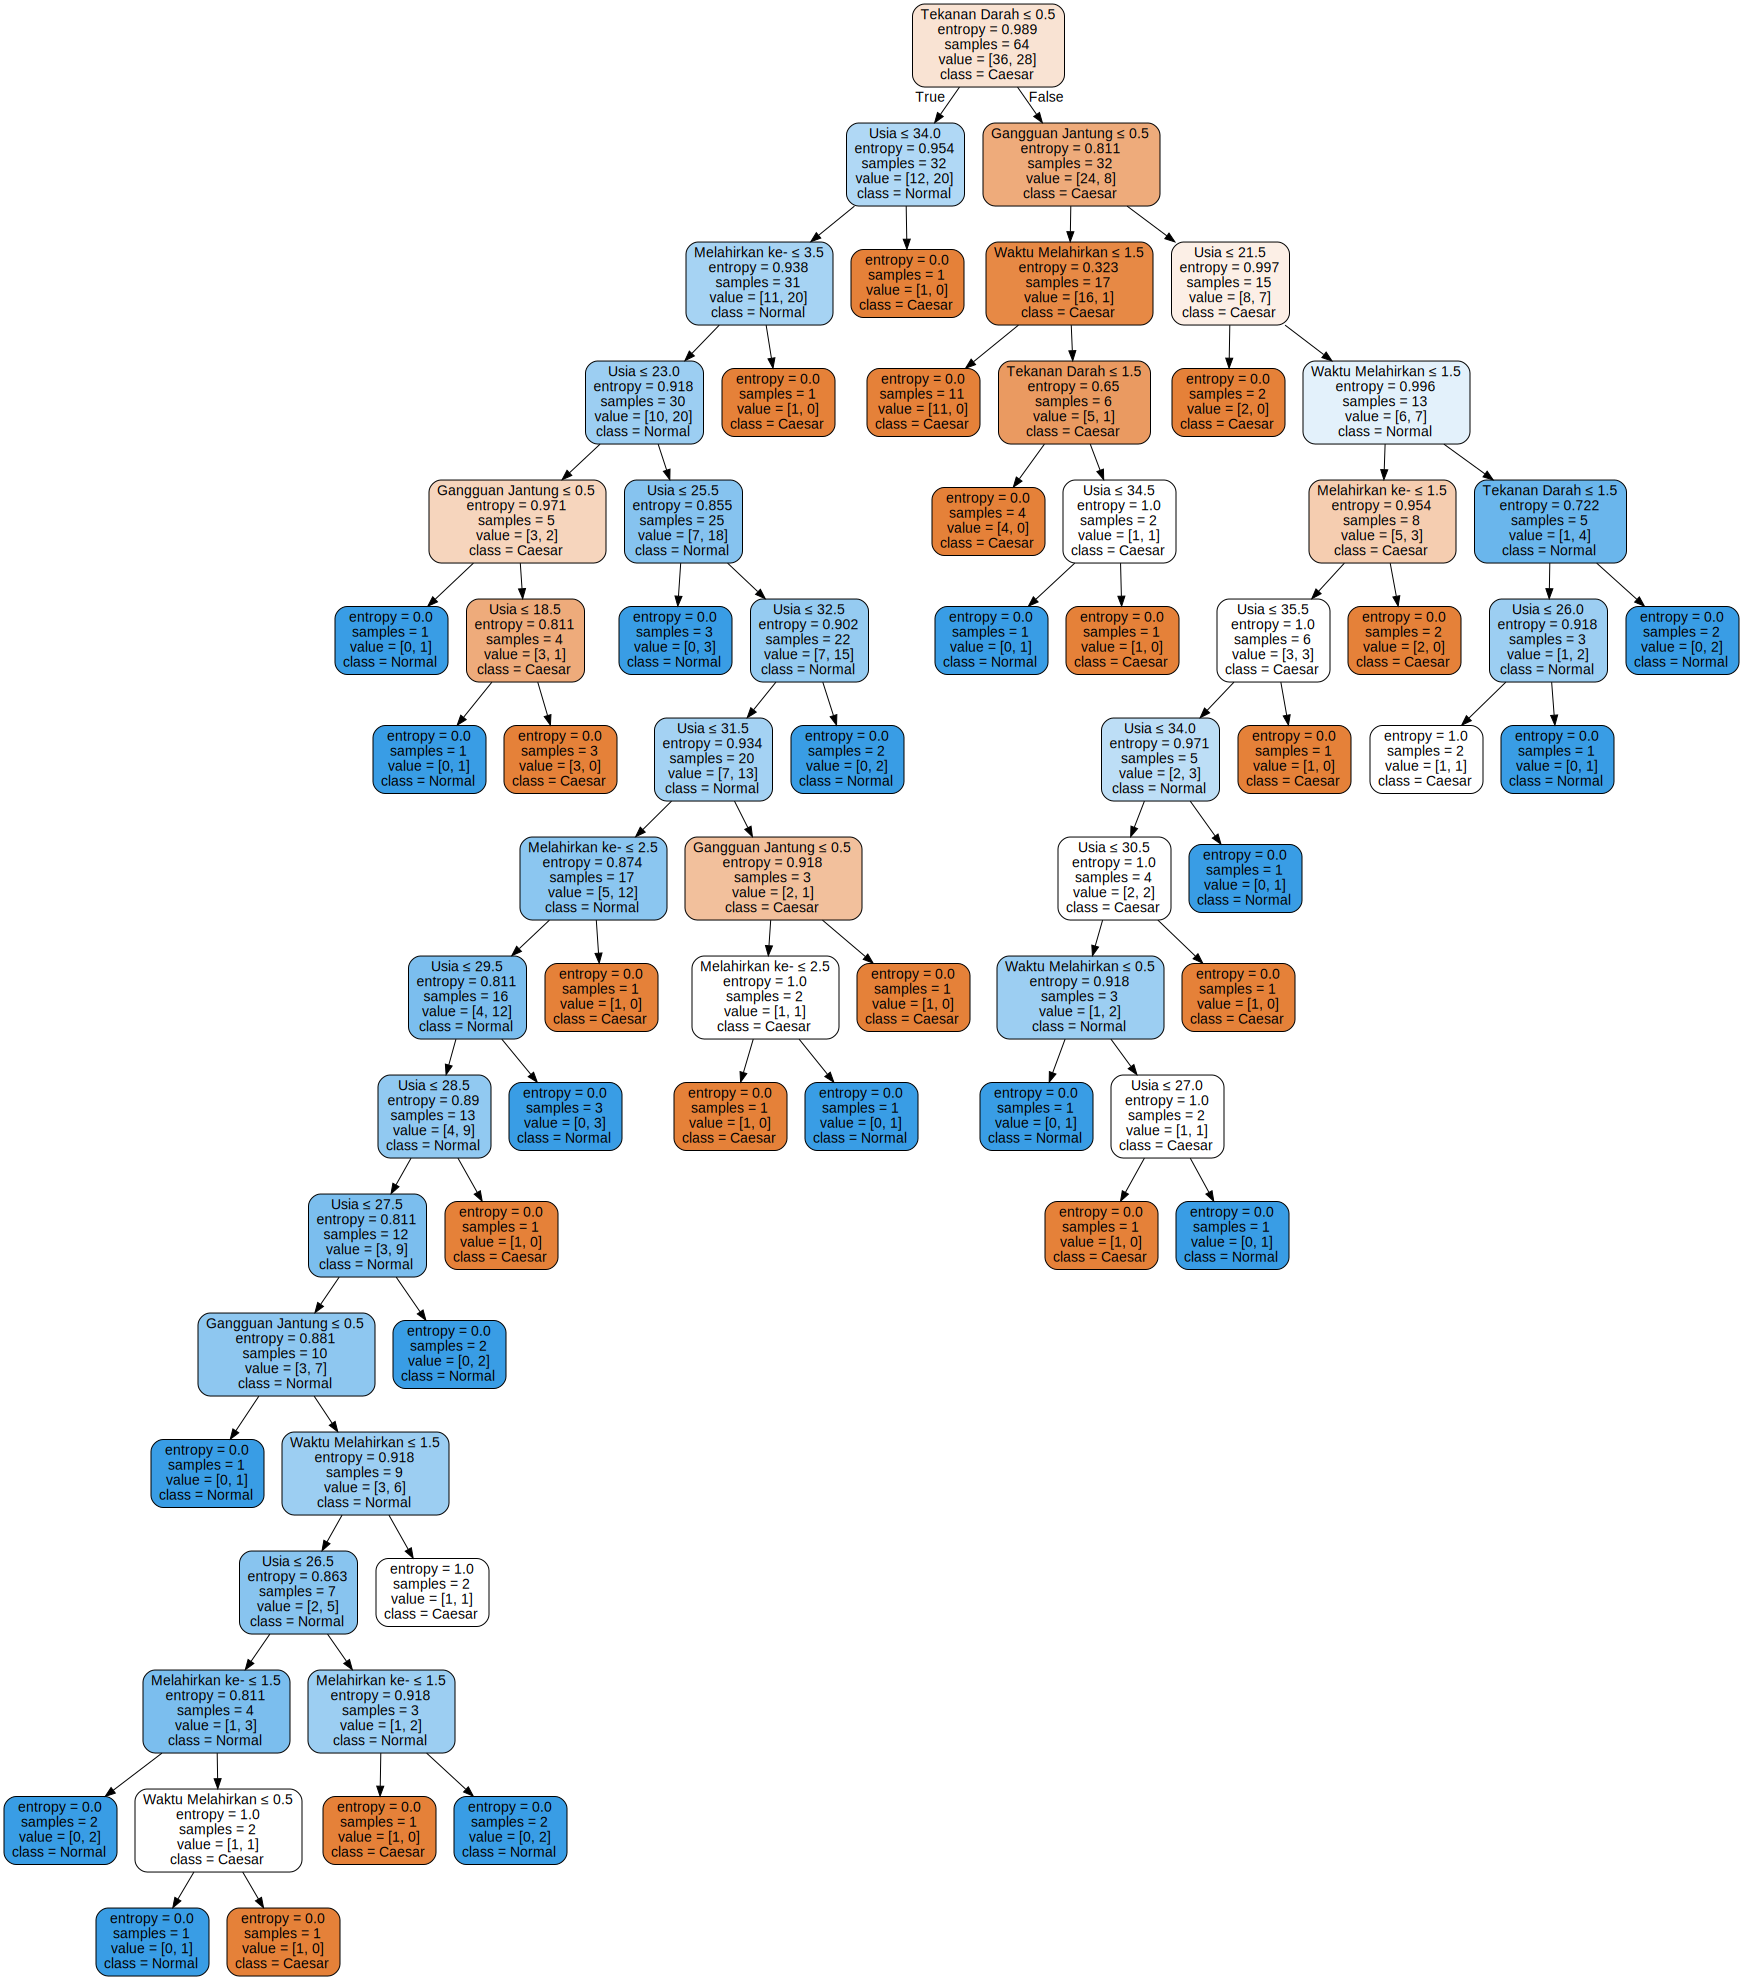

In [ ]:
import graphviz

dot_data = tree.export_graphviz(Tree,out_file=None, feature_names=X_train.columns,
                                class_names=np.unique(y_train), filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph